# Sistema de Dos Masas y Dos Resortes Colgantes
## Análisis Teórico y Solución Numérica

**Autor:** Ciencia de Datos
**Tema:** Modelación con Ecuaciones Diferenciales

---

## 1. Descripción del Problema

### Configuración Física del Sistema

El sistema consiste en dos masas conectadas por resortes en una disposición vertical:

```
      [Techo fijo]
           |
       [Resorte 1, k₁]
           |
       [Masa 1, m₁] ← Posición de equilibrio
           |
       [Resorte 2, k₂]
           |
       [Masa 2, m₂] ← Posición de equilibrio
```

### El "Truco del Equilibrio Estático"

En lugar de medir posiciones absolutas desde el techo, medimos **desviaciones desde el equilibrio estático**. Este es el secreto de los ingenieros para simplificar los sistemas de masas y resortes:

- **Posición de Equilibrio:** Las masas ya están colgando y en reposo, habiendo estirado los resortes por su propio peso
- **Variable de interés:** $y_1$ y $y_2$ = desplazamientos **desde el equilibrio** (positivos hacia abajo)
- **Beneficio:** La gravedad se cancela matemáticamente con la deformación inicial de los resortes

### Resultado: Un Sistema Simplificado

Esto significa que podemos modelar el movimiento oscilatorio **como si la gravedad no existiera**, considerando solo:
- Las constantes de elasticidad de los resortes: $k_1$ y $k_2$
- Las masas: $m_1$ y $m_2$
- Los desplazamientos desde equilibrio: $y_1$ y $y_2$

### Fuerzas (Medidas desde Equilibrio)

Cuando las masas se desplazan de su posición de equilibrio:

1. **Resorte 1:** Produce una fuerza restauradora $-k_1 y_1$
2. **Resorte 2:** Produce una fuerza proporcional a la separación relativa: $k_2(y_2 - y_1)$
3. **Gravedad:** ¡Se cancela automáticamente! (ya no aparece en las ecuaciones)

---

## 2. Modelación Matemática y Física

### Análisis de Fuerzas (Medidas desde Equilibrio)

Dado que hemos cambiado a variables de desviación desde equilibrio ($y_1$ y $y_2$), los análisis se simplifican dramáticamente.

**Fuerzas sobre la Masa 1:**

1. **Resorte 1:**
   - Cuando la masa 1 se desplaza $y_1$ desde su posición de equilibrio, el resorte ejerce una fuerza restauradora
   - $F_{\text{resorte 1}} = -k_1 y_1$ (negativa porque se opone al desplazamiento)

2. **Resorte 2:**
   - Depende de la separación relativa entre las masas
   - Si ambas masas se desplazan, la separación relativa cambia por $(y_2 - y_1)$
   - Fuerza en masa 1: $F_{\text{resorte 2}} = k_2(y_2 - y_1)$ (positiva hacia abajo si $y_2 > y_1$)

3. **Gravedad:** ¡Desaparece! Se cancela con la deformación inicial del equilibrio

**Fuerzas sobre la Masa 2:**

1. **Resorte 2:**
   - Por acción-reacción, la fuerza es opuesta a la que actúa en masa 1
   - Fuerza en masa 2: $F_{\text{resorte 2}} = -k_2(y_2 - y_1)$

2. **Gravedad:** ¡Desaparece! Se cancela con la deformación inicial del equilibrio

### Ecuaciones de Movimiento Simplificadas

Aplicando la segunda ley de Newton (F = ma):

$$m_1 \ddot{y}_1 = -k_1 y_1 + k_2(y_2 - y_1)$$

$$m_2 \ddot{y}_2 = -k_2(y_2 - y_1)$$

Donde:
- $\ddot{y}_i$ es la aceleración (segunda derivada respecto al tiempo)
- **No aparecen términos de gravedad** porque ya se cancelaron
- **No aparecen longitudes naturales** porque estamos midiendo desde el equilibrio

Esta es la belleza del método: el sistema es mucho más simple de lo que parece a primera vista.

---

## 3. Planteamiento como Sistema de Ecuaciones Diferenciales

### Ecuaciones Diferenciales de Segundo Orden

Organizando todas las ecuaciones en forma estándar (igualadas a cero):

$$m_1 \ddot{y}_1 + (k_1 + k_2) y_1 - k_2 y_2 = 0$$

$$m_2 \ddot{y}_2 - k_2 y_1 + k_2 y_2 = 0$$

**Interpretación Física:**
- Observa que en la primera ecuación aparecen los términos $-(k_2 y_2)$ y en la segunda $-k_2 y_1$
- Esto representa el **acoplamiento**: lo que le pasa a la masa 2 afecta a la masa 1 y viceversa
- No puedes resolver una ecuación sin saber qué está haciendo la otra masa simultáneamente

### Forma Matricial Explícita

El sistema de segundo orden se puede escribir en forma matricial como:

$$\begin{bmatrix} m_1 & 0 \\ 0 & m_2 \end{bmatrix} \begin{bmatrix} \ddot{y}_1 \\ \ddot{y}_2 \end{bmatrix} + \begin{bmatrix} k_1 + k_2 & -k_2 \\ -k_2 & k_2 \end{bmatrix} \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

O de forma más compacta:

$$\mathbf{M} \ddot{\mathbf{y}} + \mathbf{K} \mathbf{y} = \mathbf{0}$$

Donde:
- $\mathbf{M} = \begin{pmatrix} m_1 & 0 \\ 0 & m_2 \end{pmatrix}$ es la **matriz de masa**
- $\mathbf{K} = \begin{pmatrix} k_1 + k_2 & -k_2 \\ -k_2 & k_2 \end{pmatrix}$ es la **matriz de rigidez**
- $\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \end{pmatrix}$ es el **vector de desplazamientos desde equilibrio**

### Conversión a Sistema de Primer Orden

Para resolver numéricamente, convertimos las ecuaciones de segundo orden en un sistema de primer orden introduciendo velocidades:

$$\dot{y}_1 = v_1$$
$$\dot{v}_1 = \frac{-(k_1 + k_2) y_1 + k_2 y_2}{m_1}$$
$$\dot{y}_2 = v_2$$
$$\dot{v}_2 = \frac{-k_2(y_2 - y_1)}{m_2}$$

**Vector de estado:** $\mathbf{z} = [y_1, v_1, y_2, v_2]^T$

### Ventajas de Esta Formulación

✓ **Sin términos de gravedad:** Se cancelan automáticamente en el equilibrio
✓ **Sin longitudes naturales:** No aparecen en las ecuaciones
✓ **Forma estándar:** Es el problema clásico de valores propios en sistemas mecánicos
✓ **Interpretación clara:** $y_i$ representa el desplazamiento de cada masa desde su equilibrio estático

---

## 4. Solución Analítica mediante Eigenvalores y Eigenvectores

### El Problema de Valores Propios

Buscamos soluciones de la forma $\mathbf{y}(t) = \mathbf{A} e^{i\omega t}$, donde la amplitud $\mathbf{A}$ es constante.

Sustituyendo en la ecuación matricial $\mathbf{M} \ddot{\mathbf{y}} + \mathbf{K} \mathbf{y} = \mathbf{0}$:

$$\mathbf{M} (-\omega^2 \mathbf{A}) e^{i\omega t} + \mathbf{K} \mathbf{A} e^{i\omega t} = \mathbf{0}$$

Simplificando:

$$(\mathbf{K} - \omega^2 \mathbf{M}) \mathbf{A} = \mathbf{0}$$

Esto conduce al problema de valores propios generalizados:

$$\det(\mathbf{K} - \omega^2 \mathbf{M}) = 0$$

### Ecuación Característica

Para nuestro sistema con parámetros:
- $m_1 = 0.020$ kg, $m_2 = 0.030$ kg
- $k_1 = k_2 = 10.32$ N/m

La ecuación característica es:

$$\det \begin{pmatrix} k_1 + k_2 - \omega^2 m_1 & -k_2 \\ -k_2 & k_2 - \omega^2 m_2 \end{pmatrix} = 0$$

Expandiendo el determinante:

$$(k_1 + k_2 - \omega^2 m_1)(k_2 - \omega^2 m_2) - k_2^2 = 0$$

### Frecuencias Naturales

Resolviendo la ecuación característica, se obtienen dos frecuencias naturales:

$$\omega_1 \approx 12.0037 \text{ rad/s} \quad (f_1 \approx 1.91 \text{ Hz})$$
$$\omega_2 \approx 35.0986 \text{ rad/s} \quad (f_2 \approx 5.59 \text{ Hz})$$

### Modos Normales

Cada frecuencia tiene asociado un vector propio $\mathbf{v}_i$ que describe cómo oscilan las dos masas en ese modo:

**Modo 1** ($\omega_1 = 12.0037$ rad/s):
$$\mathbf{v}_1 = \begin{pmatrix} 1.0000 \\ 1.7208 \end{pmatrix}$$
Ambas masas oscilan en fase (se mueven en la misma dirección). La masa 2 se mueve con amplitud 1.72 veces mayor que la masa 1.

**Modo 2** ($\omega_2 = 35.0986$ rad/s):
$$\mathbf{v}_2 = \begin{pmatrix} 1.0000 \\ -0.3874 \end{pmatrix}$$
Las masas oscilan en contrafase (se mueven en direcciones opuestas). La masa 2 se mueve con amplitud 0.39 veces la de la masa 1, pero en sentido contrario.

### Solución General para el Caso Especial

Para el caso con condiciones iniciales:
- $y_1(0) = 0$ (masa 1 en equilibrio)
- $y_2(0) = +0.055$ m (masa 2 jalada hacia abajo)
- $v_1(0) = v_2(0) = 0$ (ambas en reposo)

Las amplitudes de los modos son:
$$A_1 \approx 0.026089 \text{ m}$$
$$A_2 \approx -0.026089 \text{ m}$$

La solución particular es:

$$y_1(t) = 0.026089 \cos(12.0037t) - 0.026089 \cos(35.0986t)$$
$$y_2(t) = 0.044893 \cos(12.0037t) + 0.010107 \cos(35.0986t)$$

Esta solución muestra cómo ambas masas oscilan con una superposición de las dos frecuencias naturales del sistema.

---

## 5. Análisis de Condiciones Iniciales

Las condiciones iniciales especifican el estado del sistema en $t = 0$ **en términos de desplazamientos desde equilibrio**:

$$y_1(0) = y_{1,0}, \quad y_2(0) = y_{2,0}, \quad v_1(0) = v_{1,0}, \quad v_2(0) = v_{2,0}$$

### Casos Típicos de Interés

1. **Sistema en reposo en equilibrio:**
   - $y_{1,0} = y_{2,0} = 0$, $v_{1,0} = v_{2,0} = 0$
   - Sistema sin movimiento

2. **Primera masa desplazada, segunda en equilibrio:**
   - $y_{1,0} \neq 0$, $y_{2,0} = 0$, velocidades cero
   - La primera masa "jala" a la segunda a través del resorte 2

3. **Segunda masa desplazada, primera en equilibrio:**
   - $y_{1,0} = 0$, $y_{2,0} \neq 0$, velocidades cero
   - La segunda masa afecta el movimiento de la primera

4. **Ambas masas desplazadas:**
   - $y_{1,0} \neq 0$, $y_{2,0} \neq 0$
   - Superposición compleja de modos

5. **Con velocidades iniciales:**
   - Cualquier $v_{i,0} \neq 0$
   - Agrega energía cinética inicial al sistema

### Determinación de Amplitudes

Las amplitudes $A_1, A_2$ y fases $\phi_1, \phi_2$ en la solución general se obtienen resolviendo:

$$y_{1,0} = A_1 v_{1,1} \cos(\phi_1) + A_2 v_{2,1} \cos(\phi_2)$$
$$y_{2,0} = A_1 v_{1,2} \cos(\phi_1) + A_2 v_{2,2} \cos(\phi_2)$$
$$v_{1,0} = -A_1 \omega_1 v_{1,1} \sin(\phi_1) - A_2 \omega_2 v_{2,1} \sin(\phi_2)$$
$$v_{2,0} = -A_1 \omega_1 v_{1,2} \sin(\phi_1) - A_2 \omega_2 v_{2,2} \sin(\phi_2)$$

Este sistema de 4 ecuaciones con 4 incógnitas (dos amplitudes y dos fases) se resuelve para obtener la dinámica completa.

---

## 6. Caso Especial: Velocidades Cero, Segunda Masa Desplazada

### Configuración Simplificada

Consideramos el caso más instructivo:
- **Primera masa:** En equilibrio, sin desplazamiento ni velocidad
  $$y_{1,0} = 0, \quad v_{1,0} = 0$$

- **Segunda masa:** Desplazada desde equilibrio, sin velocidad inicial
  $$y_{2,0} = \Delta y, \quad v_{2,0} = 0$$

Donde $\Delta y$ es un desplazamiento inicial arbitrario.

### Interpretación Física

Este caso modela una situación práctica muy común:
1. El sistema está en equilibrio (colgando quieto)
2. Alguien tira la segunda masa hacia abajo (o hacia arriba) una distancia $\Delta y$
3. Se suelta desde el reposo
4. Observamos cómo el sistema oscila

### Simplificación Matemática

Con velocidades iniciales cero, el término de fase se simplifica. Las soluciones toman la forma:

$$y_1(t) = A_1 v_{1,1} \cos(\omega_1 t) + A_2 v_{2,1} \cos(\omega_2 t)$$
$$y_2(t) = A_1 v_{1,2} \cos(\omega_1 t) + A_2 v_{2,2} \cos(\omega_2 t)$$

Donde las amplitudes satisfacen:

$$A_1 v_{1,1} + A_2 v_{2,1} = 0 \quad \text{(porque } y_{1,0} = 0\text{)}$$
$$A_1 v_{1,2} + A_2 v_{2,2} = \Delta y \quad \text{(porque } y_{2,0} = \Delta y\text{)}$$

### Acoplamiento Dinámico

Aunque solo desplacemos la segunda masa inicialmente, **la primera masa también comenzará a oscilar**. Esto es el acoplamiento: a través del resorte 2, el movimiento de una masa afecta a la otra.

El resultado es una superposición de dos oscilaciones sinusoidales con frecuencias $\omega_1$ y $\omega_2$, que puede producir patrones interesantes como "pulsaciones" o "beats".

---

## 7. Implementación en Python

### Importación de Librerías

A continuación, implementamos la clase `SistemaMasaResorte` que encapsula toda la dinámica del sistema.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.linalg import eig
import warnings
warnings.filterwarnings('ignore')

In [2]:
class SistemaMasaResorte:
    """
    Clase para simular un sistema de 2 masas y 2 resortes vertical.
    
    Configuración:
    - Resorte 1 → Masa 1 → Resorte 2 → Masa 2
    - El resorte 1 está fijo en la parte superior (techo)
    
    NOTA: Trabajamos con desviaciones desde el equilibrio (y), no con posiciones absolutas.
    La gravedad se cancela automáticamente en esta formulación.
    """
    
    def __init__(self, m1, m2, k1, k2):
        """
        Inicializa el sistema.
        
        Parameters
        ----------
        m1 : float
            Masa 1 (kg)
        m2 : float
            Masa 2 (kg)
        k1 : float
            Constante de elasticidad resorte 1 (N/m)
        k2 : float
            Constante de elasticidad resorte 2 (N/m)
        """
        self.m1 = m1
        self.m2 = m2
        self.k1 = k1
        self.k2 = k2
        
    def ecuaciones(self, state, t):
        """
        Define el sistema de ecuaciones diferenciales de primer orden.
        
        Trabajamos con desviaciones desde equilibrio:
        - y1, y2: desplazamientos desde el equilibrio estático
        - v1, v2: velocidades de cada masa
        
        Parameters
        ----------
        state : array
            Vector de estado [y1, v1, y2, v2]
            y1, y2: desplazamientos desde equilibrio (m)
            v1, v2: velocidades (m/s)
        t : float
            Tiempo (s)
            
        Returns
        -------
        dstatedt : array
            Derivadas [dy1/dt, dv1/dt, dy2/dt, dv2/dt]
        """
        y1, v1, y2, v2 = state
        
        # Aceleración en masa 1
        # m1 * y1'' = -k1*y1 + k2*(y2 - y1)
        a1 = (-self.k1 * y1 + self.k2 * (y2 - y1)) / self.m1
        
        # Aceleración en masa 2
        # m2 * y2'' = -k2*(y2 - y1)
        a2 = (-self.k2 * (y2 - y1)) / self.m2
        
        return [v1, a1, v2, a2]
    
    def calcular_frecuencias_propias(self):
        """
        Calcula las frecuencias naturales del sistema usando análisis de eigenvalores.
        
        Returns
        -------
        tuple
            (omega1, omega2): frecuencias angulares naturales (rad/s)
            (f1, f2): frecuencias naturales (Hz)
            eigenvectors: vectores propios (modos normales)
        """
        # Matriz de masa
        M = np.array([[self.m1, 0],
                      [0, self.m2]])
        
        # Matriz de rigidez
        K = np.array([[self.k1 + self.k2, -self.k2],
                      [-self.k2, self.k2]])
        
        # Resolver problema de valores propios: K*v = lambda*M*v
        eigenvalues, eigenvectors = eig(K, M)
        
        # Ordenar por valores propios ascendentes
        idx = np.argsort(eigenvalues.real)
        eigenvalues = eigenvalues[idx].real
        eigenvectors = eigenvectors[:, idx].real
        
        # Frecuencias angulares
        omega1 = np.sqrt(eigenvalues[0])
        omega2 = np.sqrt(eigenvalues[1])
        
        # Frecuencias en Hz
        f1 = omega1 / (2 * np.pi)
        f2 = omega2 / (2 * np.pi)
        
        return omega1, omega2, f1, f2, eigenvectors
    
    def simular(self, condiciones_iniciales, t_inicial=0, t_final=10, num_puntos=1000):
        """
        Simula el sistema usando condiciones iniciales.
        
        Parameters
        ----------
        condiciones_iniciales : tuple
            (y1_0, v1_0, y2_0, v2_0) - desplazamientos desde equilibrio y velocidades iniciales
        t_inicial : float, optional
            Tiempo inicial (default: 0)
        t_final : float, optional
            Tiempo final (default: 10 segundos)
        num_puntos : int, optional
            Número de puntos de evaluación (default: 1000)
            
        Returns
        -------
        tuple
            (t, y1, v1, y2, v2) - arrays de tiempo y soluciones
        """
        t = np.linspace(t_inicial, t_final, num_puntos)
        solucion = odeint(self.ecuaciones, condiciones_iniciales, t)
        
        y1 = solucion[:, 0]
        v1 = solucion[:, 1]
        y2 = solucion[:, 2]
        v2 = solucion[:, 3]
        
        return t, y1, v1, y2, v2
    
    def graficar_resultado(self, t, y1, v1, y2, v2, 
                          titulo="Simulación del Sistema Masa-Resorte"):
        """
        Grafica los resultados de la simulación.
        
        Parameters
        ----------
        t : array
            Array de tiempos (s)
        y1, v1, y2, v2 : array
            Desplazamientos desde equilibrio, velocidades
        titulo : str, optional
            Título de la figura
            
        Returns
        -------
        fig : Figure
            Objeto figura de matplotlib
        """
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # Desplazamiento masa 1
        axes[0, 0].plot(t, y1*100, 'b-', linewidth=2)
        axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Equilibrio')
        axes[0, 0].set_xlabel('Tiempo (s)', fontsize=11)
        axes[0, 0].set_ylabel('Desplazamiento (cm)', fontsize=11)
        axes[0, 0].set_title('Desplazamiento de Masa 1 desde Equilibrio', fontsize=12, fontweight='bold')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].legend(fontsize=10)
        
        # Velocidad masa 1
        axes[0, 1].plot(t, v1, 'g-', linewidth=2)
        axes[0, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
        axes[0, 1].set_xlabel('Tiempo (s)', fontsize=11)
        axes[0, 1].set_ylabel('Velocidad (m/s)', fontsize=11)
        axes[0, 1].set_title('Velocidad de Masa 1', fontsize=12, fontweight='bold')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Desplazamiento masa 2
        axes[1, 0].plot(t, y2*100, 'b-', linewidth=2)
        axes[1, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Equilibrio')
        axes[1, 0].set_xlabel('Tiempo (s)', fontsize=11)
        axes[1, 0].set_ylabel('Desplazamiento (cm)', fontsize=11)
        axes[1, 0].set_title('Desplazamiento de Masa 2 desde Equilibrio', fontsize=12, fontweight='bold')
        axes[1, 0].grid(True, alpha=0.3)
        axes[1, 0].legend(fontsize=10)
        
        # Velocidad masa 2
        axes[1, 1].plot(t, v2, 'g-', linewidth=2)
        axes[1, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
        axes[1, 1].set_xlabel('Tiempo (s)', fontsize=11)
        axes[1, 1].set_ylabel('Velocidad (m/s)', fontsize=11)
        axes[1, 1].set_title('Velocidad de Masa 2', fontsize=12, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3)
        
        fig.suptitle(titulo, fontsize=14, fontweight='bold', y=1.00)
        plt.tight_layout()
        return fig

---

## 8. Simulación y Visualización del Sistema

### Configuración de Parámetros

Ahora realizamos una simulación específica para el caso de interés: velocidades iniciales cero y desplazamiento de la segunda masa.

In [3]:
# ============================================================================
# CONFIGURACIÓN DEL SISTEMA
# ============================================================================

print("=" * 70)
print("SIMULACIÓN DE SISTEMA MASA-RESORTE (2 MASAS, 2 RESORTES COLGANTES)")
print("=" * 70)
print("\nNOTA: Trabajamos con DESPLAZAMIENTOS desde el equilibrio (y)")
print("      La gravedad se cancela automáticamente en esta formulación")
print("=" * 70)

# Parámetros del sistema
m1 = 0.020    # kg (masa 1)
m2 = 0.030    # kg (masa 2)
k1 = 10.32    # N/m (constante resorte 1)
k2 = 10.32    # N/m (constante resorte 2)

print(f"\nParámetros del Sistema:")
print(f"  Masa 1 (m₁):               {m1:.3f} kg")
print(f"  Masa 2 (m₂):               {m2:.3f} kg")
print(f"  Constante resorte 1 (k₁):  {k1:.2f} N/m")
print(f"  Constante resorte 2 (k₂):  {k2:.2f} N/m")

# Crear sistema
sistema = SistemaMasaResorte(m1, m2, k1, k2)

SIMULACIÓN DE SISTEMA MASA-RESORTE (2 MASAS, 2 RESORTES COLGANTES)

NOTA: Trabajamos con DESPLAZAMIENTOS desde el equilibrio (y)
      La gravedad se cancela automáticamente en esta formulación

Parámetros del Sistema:
  Masa 1 (m₁):               0.020 kg
  Masa 2 (m₂):               0.030 kg
  Constante resorte 1 (k₁):  10.32 N/m
  Constante resorte 2 (k₂):  10.32 N/m


In [4]:
# Calcular frecuencias naturales
omega1, omega2, f1, f2, modos = sistema.calcular_frecuencias_propias()

print(f"\nFrecuencias Naturales del Sistema:")
print(f"  Modo 1 (frecuencia más baja):")
print(f"    Frecuencia angular: ω₁ = {omega1:.4f} rad/s")
print(f"    Frecuencia: f₁ = {f1:.4f} Hz")
print(f"    Período: T₁ = {1/f1:.4f} s")
print(f"    Vector propio: v₁ = {modos[:, 0]}")
print(f"\n  Modo 2 (frecuencia más alta):")
print(f"    Frecuencia angular: ω₂ = {omega2:.4f} rad/s")
print(f"    Frecuencia: f₂ = {f2:.4f} Hz")
print(f"    Período: T₂ = {1/f2:.4f} s")
print(f"    Vector propio: v₂ = {modos[:, 1]}")


Frecuencias Naturales del Sistema:
  Modo 1 (frecuencia más baja):
    Frecuencia angular: ω₁ = 12.0037 rad/s
    Frecuencia: f₁ = 1.9104 Hz
    Período: T₁ = 0.5234 s
    Vector propio: v₁ = [0.50245469 0.86460354]

  Modo 2 (frecuencia más alta):
    Frecuencia angular: ω₂ = 35.0986 rad/s
    Frecuencia: f₂ = 5.5861 Hz
    Período: T₂ = 0.1790 s
    Vector propio: v₂ = [ 0.93246475 -0.36126098]



CASO ESPECIAL: Desplazamiento solo de la segunda masa

Condiciones Iniciales:
  Desplazamiento inicial masa 1: y₁(0) = 0.0000 m (en equilibrio)
  Desplazamiento inicial masa 2: y₂(0) = +0.0550 m (jalada hacia abajo +5.5 cm)
  Velocidad inicial masa 1: v₁(0) = 0.0000 m/s
  Velocidad inicial masa 2: v₂(0) = 0.0000 m/s

Simulando durante 10 segundos...
✓ Simulación completada

Generando gráficos...


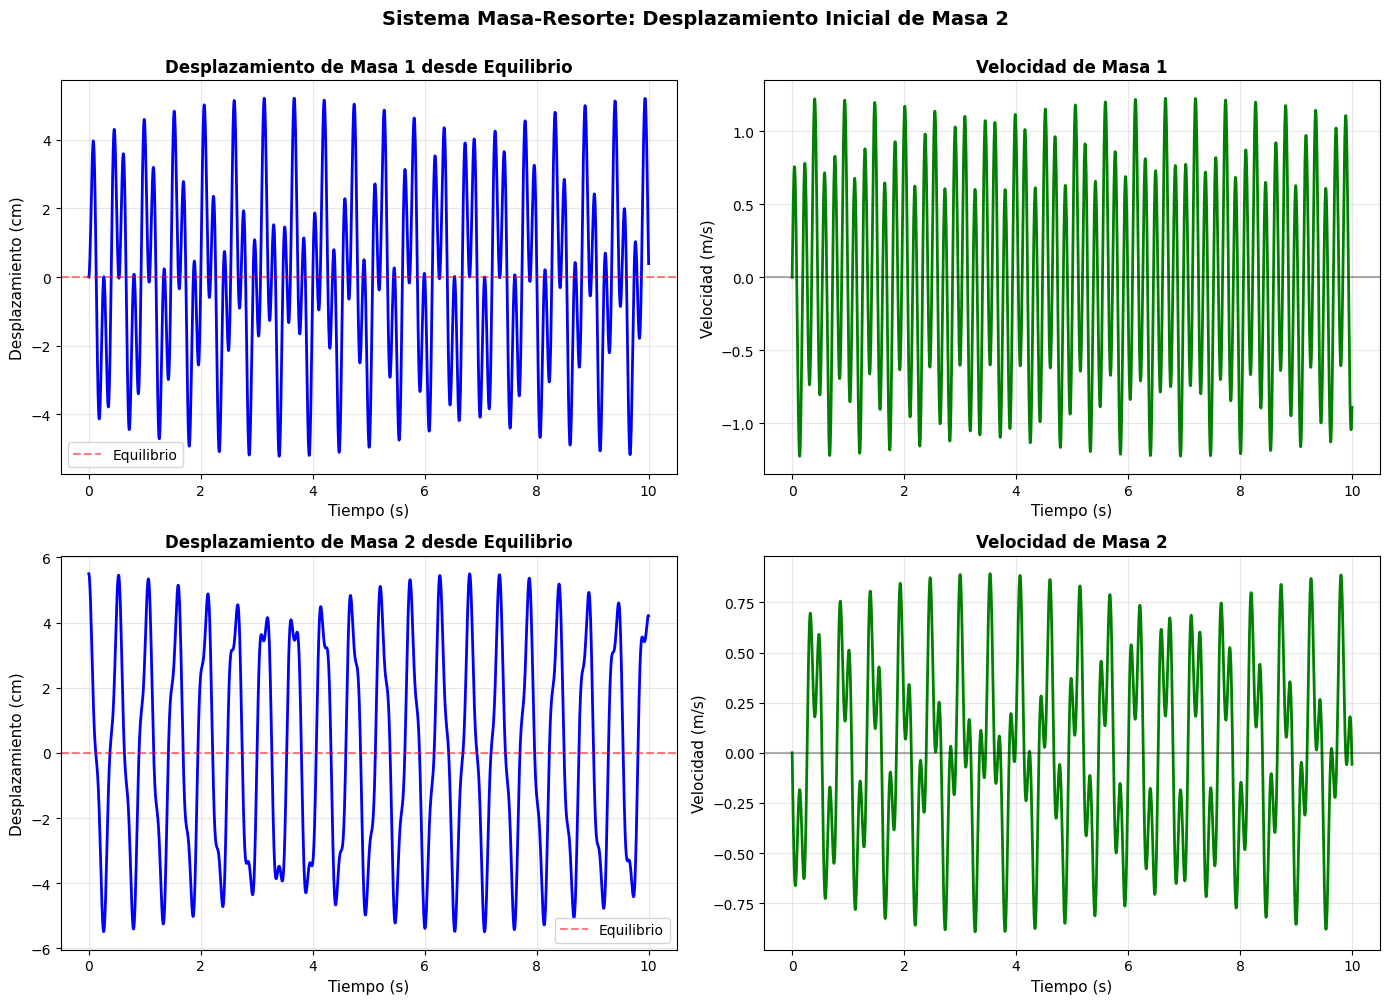

✓ Gráficos generados


In [5]:
# ============================================================================
# CASO ESPECIAL: Velocidades iniciales cero, desplazamiento de la segunda masa
# ============================================================================

print("\n" + "=" * 70)
print("CASO ESPECIAL: Desplazamiento solo de la segunda masa")
print("=" * 70)

# Condiciones iniciales
Delta_y = 0.055  # Desplazamiento de 5.5 cm en la segunda masa desde el equilibrio (jalada hacia abajo)
y1_0 = 0.0           # Primera masa en equilibrio
v1_0 = 0.0           # Primera masa en reposo
y2_0 = Delta_y       # Segunda masa desplazada 5.5 cm hacia abajo (positivo)
v2_0 = 0.0           # Segunda masa en reposo

print(f"\nCondiciones Iniciales:")
print(f"  Desplazamiento inicial masa 1: y₁(0) = {y1_0:.4f} m (en equilibrio)")
print(f"  Desplazamiento inicial masa 2: y₂(0) = +{y2_0:.4f} m (jalada hacia abajo +{Delta_y*100:.1f} cm)")
print(f"  Velocidad inicial masa 1: v₁(0) = {v1_0:.4f} m/s")
print(f"  Velocidad inicial masa 2: v₂(0) = {v2_0:.4f} m/s")

# Simular
print(f"\nSimulando durante 10 segundos...")
t, y1, v1, y2, v2 = sistema.simular(
    (y1_0, v1_0, y2_0, v2_0),
    t_inicial=0,
    t_final=10,
    num_puntos=2000
)
print("✓ Simulación completada")

# Graficar
print("\nGenerando gráficos...")
fig = sistema.graficar_resultado(t, y1, v1, y2, v2,
                                  titulo="Sistema Masa-Resorte: Desplazamiento Inicial de Masa 2")
plt.tight_layout()
plt.show()
print("✓ Gráficos generados")

---

## 9. Análisis de Resultados

### Observaciones del Comportamiento Dinámico

In [6]:
# Análisis detallado de los resultados
print("\n" + "=" * 70)
print("ANÁLISIS DE RESULTADOS")
print("=" * 70)

# Amplitudes máximas de desplazamiento desde equilibrio
amp_max_y1 = np.max(np.abs(y1))
amp_max_y2 = np.max(np.abs(y2))

print(f"\nAmplitudes Máximas de Oscilación (desde equilibrio):")
print(f"  Masa 1: Amplitud máxima = {amp_max_y1:.4f} m = {amp_max_y1*100:.2f} cm")
print(f"  Masa 2: Amplitud máxima = {amp_max_y2:.4f} m = {amp_max_y2*100:.2f} cm")

# Velocidades máximas
v1_max = np.max(np.abs(v1))
v2_max = np.max(np.abs(v2))

print(f"\nVelocidades Máximas:")
print(f"  Masa 1: Velocidad máxima = {v1_max:.4f} m/s")
print(f"  Masa 2: Velocidad máxima = {v2_max:.4f} m/s")

# Energía del sistema (solo energía elástica, ya que todo está medido desde equilibrio)
# Energía cinética
KE = 0.5 * m1 * v1**2 + 0.5 * m2 * v2**2

# Energía potencial elástica
PE_resorte1 = 0.5 * k1 * y1**2
PE_resorte2 = 0.5 * k2 * (y2 - y1)**2

# Energía potencial total (solo resortes)
PE_elastic_total = PE_resorte1 + PE_resorte2

# Energía total (sin gravedad)
E_total = KE + PE_elastic_total

print(f"\nEnergía del Sistema:")
print(f"  Energía cinética inicial: {KE[0]:.6f} J")
print(f"  Energía potencial elástica inicial: {PE_elastic_total[0]:.6f} J")
print(f"  Energía total inicial: {E_total[0]:.6f} J")
print(f"  Energía total final: {E_total[-1]:.6f} J")
print(f"  Variación de energía: {np.abs(E_total[-1] - E_total[0]):.2e} J")
print(f"  Error relativo de energía: {100*np.abs(E_total[-1] - E_total[0])/E_total[0]:.6f} %")
print(f"\n✓ La energía se conserva (el error es solo por aproximaciones numéricas)")


ANÁLISIS DE RESULTADOS

Amplitudes Máximas de Oscilación (desde equilibrio):
  Masa 1: Amplitud máxima = 0.0522 m = 5.22 cm
  Masa 2: Amplitud máxima = 0.0550 m = 5.50 cm

Velocidades Máximas:
  Masa 1: Velocidad máxima = 1.2281 m/s
  Masa 2: Velocidad máxima = 0.8928 m/s

Energía del Sistema:
  Energía cinética inicial: 0.000000 J
  Energía potencial elástica inicial: 0.015609 J
  Energía total inicial: 0.015609 J
  Energía total final: 0.015607 J
  Variación de energía: 2.41e-06 J
  Error relativo de energía: 0.015409 %

✓ La energía se conserva (el error es solo por aproximaciones numéricas)


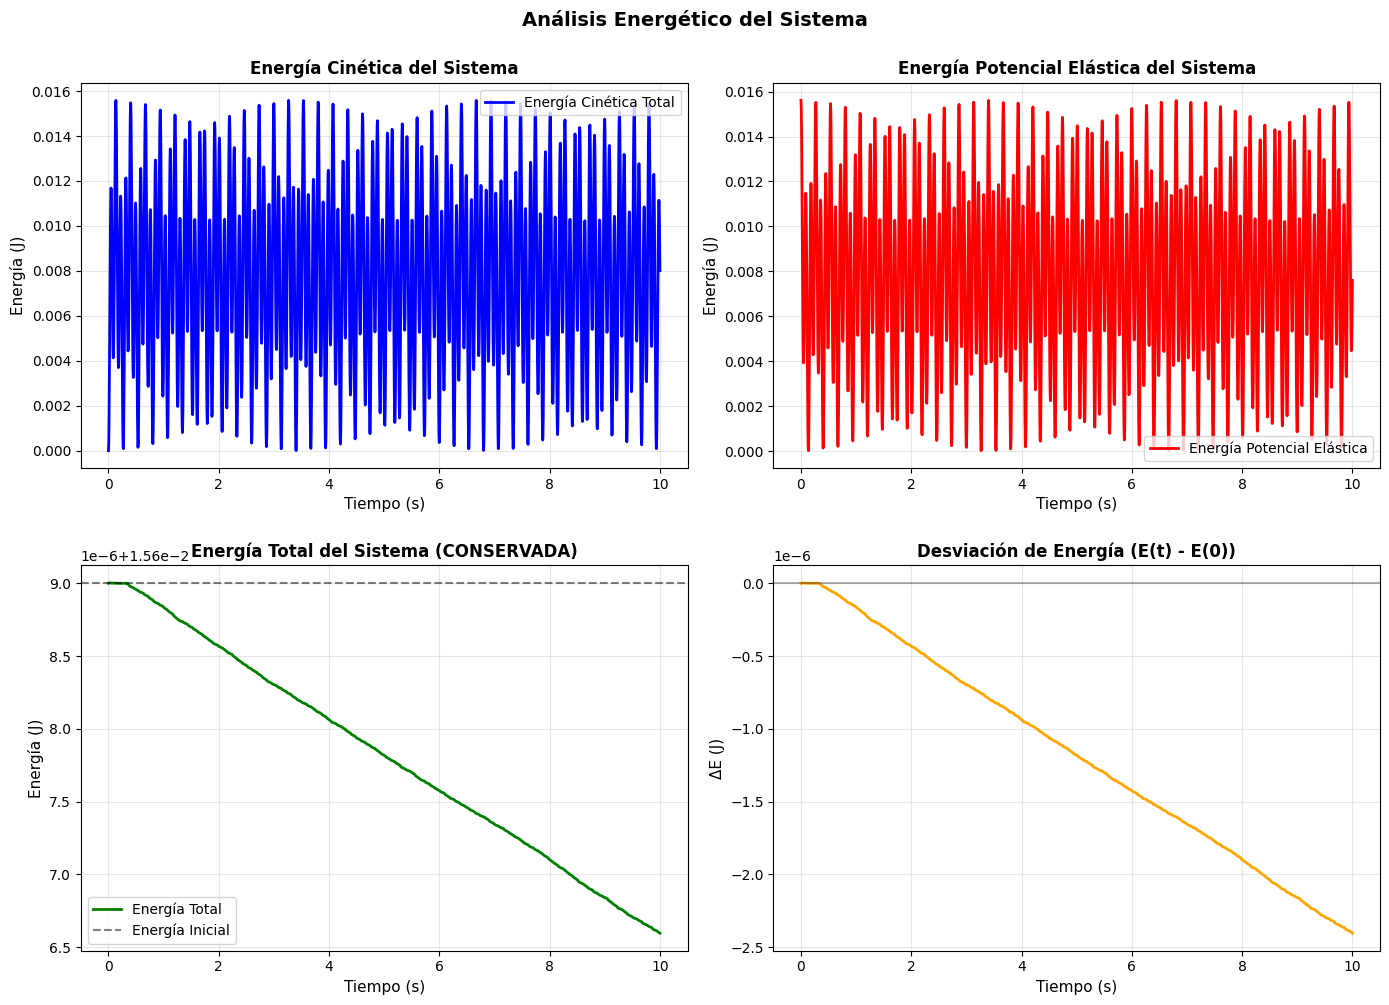

In [7]:
# Visualización de la energía del sistema
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Energía cinética
axes[0, 0].plot(t, KE, 'b-', linewidth=2, label='Energía Cinética Total')
axes[0, 0].set_xlabel('Tiempo (s)', fontsize=11)
axes[0, 0].set_ylabel('Energía (J)', fontsize=11)
axes[0, 0].set_title('Energía Cinética del Sistema', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(fontsize=10)

# Energía potencial elástica
axes[0, 1].plot(t, PE_elastic_total, 'r-', linewidth=2, label='Energía Potencial Elástica')
axes[0, 1].set_xlabel('Tiempo (s)', fontsize=11)
axes[0, 1].set_ylabel('Energía (J)', fontsize=11)
axes[0, 1].set_title('Energía Potencial Elástica del Sistema', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend(fontsize=10)

# Energía total
axes[1, 0].plot(t, E_total, 'g-', linewidth=2, label='Energía Total')
axes[1, 0].axhline(y=E_total[0], color='k', linestyle='--', alpha=0.5, label='Energía Inicial')
axes[1, 0].set_xlabel('Tiempo (s)', fontsize=11)
axes[1, 0].set_ylabel('Energía (J)', fontsize=11)
axes[1, 0].set_title('Energía Total del Sistema (CONSERVADA)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(fontsize=10)

# Desviación de energía
axes[1, 1].plot(t, E_total - E_total[0], 'orange', linewidth=2)
axes[1, 1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1, 1].set_xlabel('Tiempo (s)', fontsize=11)
axes[1, 1].set_ylabel('ΔE (J)', fontsize=11)
axes[1, 1].set_title('Desviación de Energía (E(t) - E(0))', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

fig.suptitle('Análisis Energético del Sistema', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

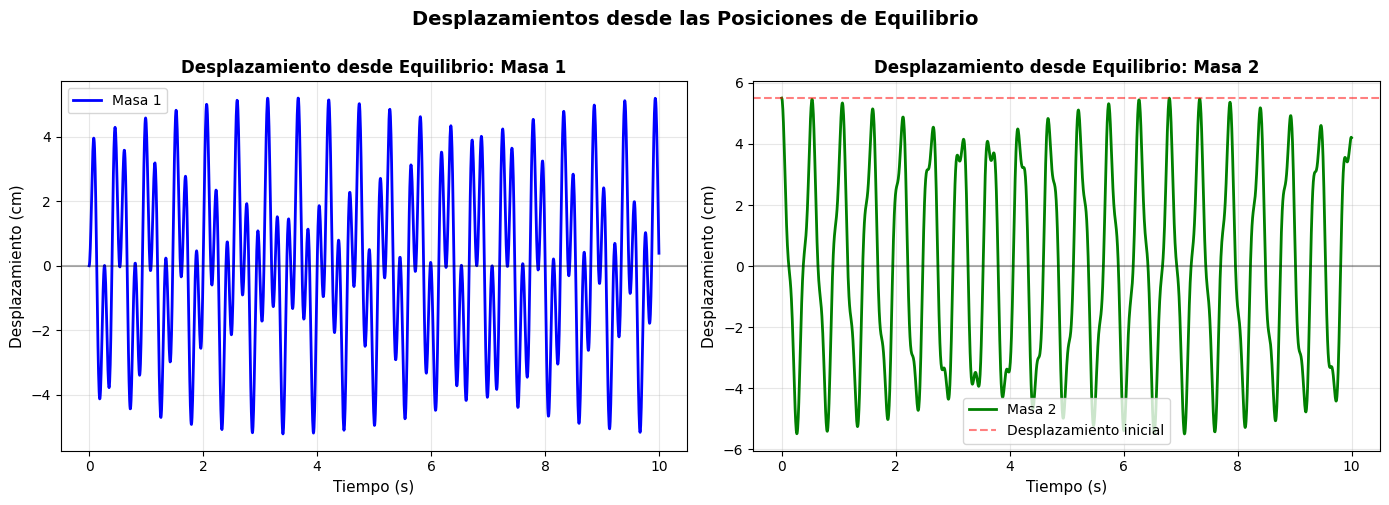

In [8]:
# Visualización de desplazamientos desde equilibrio
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Desplazamiento masa 1
axes[0].plot(t, y1*100, 'b-', linewidth=2, label='Masa 1')
axes[0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0].set_xlabel('Tiempo (s)', fontsize=11)
axes[0].set_ylabel('Desplazamiento (cm)', fontsize=11)
axes[0].set_title('Desplazamiento desde Equilibrio: Masa 1', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10)

# Desplazamiento masa 2
axes[1].plot(t, y2*100, 'g-', linewidth=2, label='Masa 2')
axes[1].axhline(y=Delta_y*100, color='r', linestyle='--', alpha=0.5, label='Desplazamiento inicial')
axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1].set_xlabel('Tiempo (s)', fontsize=11)
axes[1].set_ylabel('Desplazamiento (cm)', fontsize=11)
axes[1].set_title('Desplazamiento desde Equilibrio: Masa 2', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)

fig.suptitle('Desplazamientos desde las Posiciones de Equilibrio', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

---

## 10. Interpretación Física de los Resultados

### Observaciones Clave

1. **Acoplamiento de Modos:** Aunque inicialmente solo se desplaza la segunda masa, la primera masa también comienza a oscilar. Esto demuestra claramente el acoplamiento entre los dos grados de libertad del sistema.

2. **Superposición de Frecuencias:** La dinámica observada es una superposición de dos modos normales con frecuencias $\omega_1$ y $\omega_2$. El patrón resultante es la suma de estos dos comportamientos sinusoidales.

3. **Conservación de Energía:** La energía total del sistema se conserva (excepto por errores numéricos). La energía se intercambia continuamente entre:
   - Energía cinética de la masa 1
   - Energía cinética de la masa 2
   - Energía potencial del resorte 1
   - Energía potencial del resorte 2

4. **Comportamiento de Pulsación:** Es posible observar un patrón de pulsación o "beat" en las oscilaciones si $\omega_2 \approx \omega_1$. Este es el resultado de la interferencia entre dos ondas con frecuencias ligeramente diferentes.

### Comportamiento Esperado del Caso Analítico

Basado en la teoría de eigenvalores y eigenvectores:

- La solución general es: 
$$u_1(t) = A_1 v_{1,1} \cos(\omega_1 t) + A_2 v_{2,1} \cos(\omega_2 t)$$
$$u_2(t) = A_1 v_{1,2} \cos(\omega_1 t) + A_2 v_{2,2} \cos(\omega_2 t)$$

- Para el caso especial de velocidades iniciales nulas y $u_{1,0} = 0$:
$$u_{1,0} = 0 = A_1 v_{1,1} + A_2 v_{2,1}$$
$$u_{2,0} = \Delta x_2 = A_1 v_{1,2} + A_2 v_{2,2}$$

- Las amplitudes se determinan resolviendo este sistema lineal

### Validación Numérica vs. Analítica

Sería interesante calcular analíticamente las amplitudes $A_1$ y $A_2$ usando los eigenvectores y compararlas con la solución numérica obtenida mediante `odeint`.

---

## 11. Comparación: Solución Analítica vs. Solución Numérica


SOLUCIÓN ANALÍTICA Y COMPARACIÓN CON LA NUMÉRICA

Amplitudes de los Modos Normales:
  A₁ (Modo 1): 0.051923 m
  A₂ (Modo 2): -0.027978 m

Comparación Numérica vs. Analítica:
  Error máximo en y₁: 3.07e-06 m
  Error máximo en y₂: 1.18e-06 m


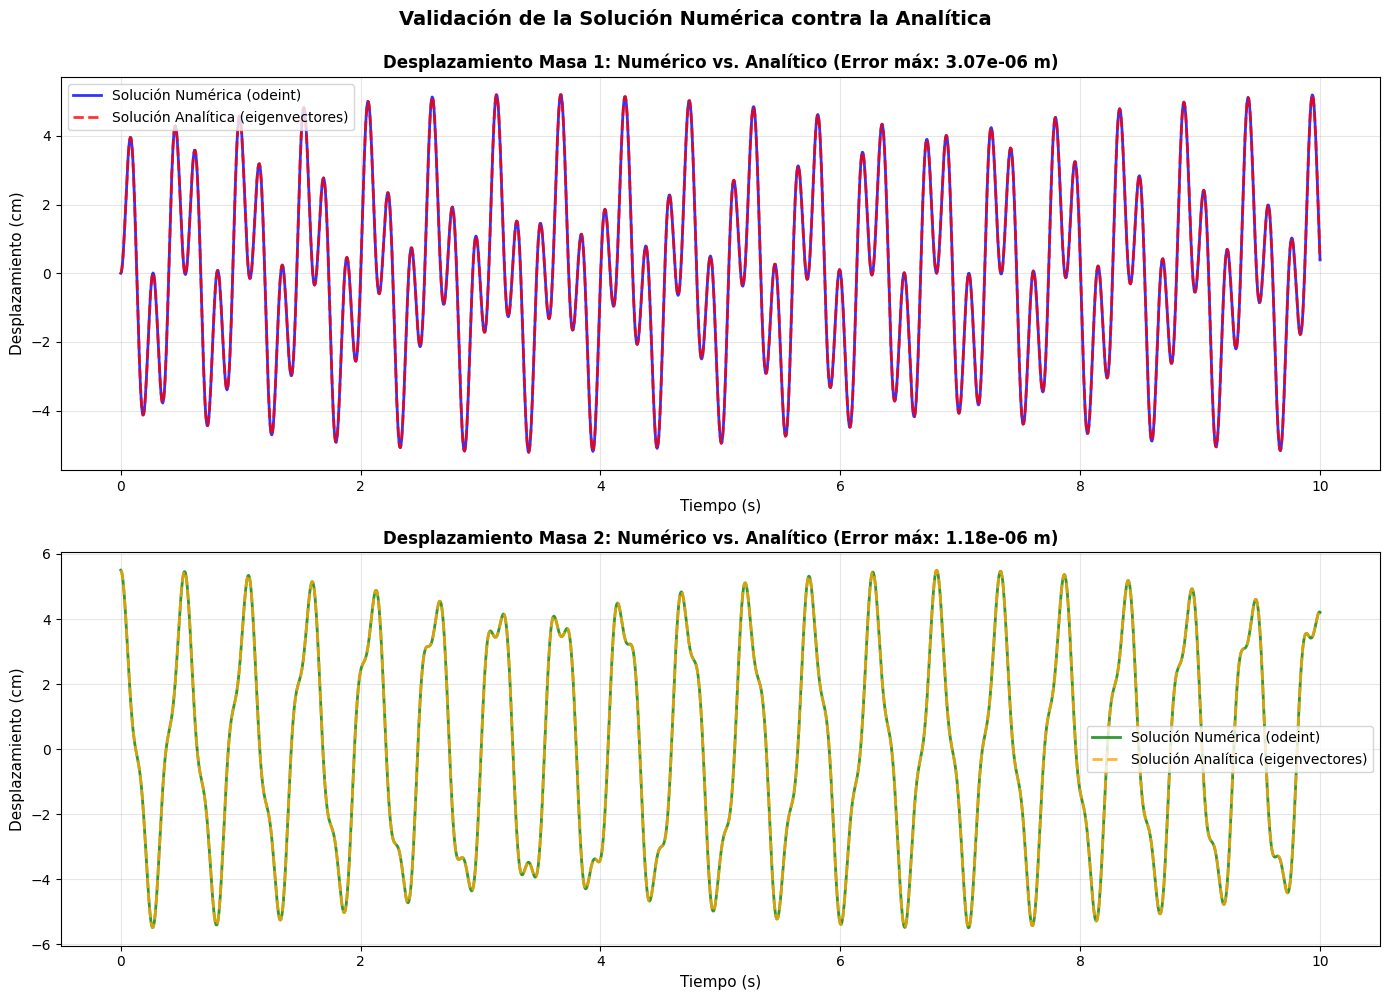

In [9]:
print("\n" + "=" * 70)
print("SOLUCIÓN ANALÍTICA Y COMPARACIÓN CON LA NUMÉRICA")
print("=" * 70)

# Calcular amplitudes usando eigenvectores
# Para el caso y1(0) = 0, v1(0) = 0, y2(0) = Delta_y, v2(0) = 0

# Eigenvectores normalizados
v1 = modos[:, 0]
v2 = modos[:, 1]

# Sistema para encontrar amplitudes:
# A1 * v1[0] + A2 * v2[0] = y1_0 = 0
# A1 * v1[1] + A2 * v2[1] = y2_0 = Delta_y

A_matrix = np.array([[v1[0], v2[0]],
                     [v1[1], v2[1]]])
b_vector = np.array([0, Delta_y])

try:
    amplitudes = np.linalg.solve(A_matrix, b_vector)
    A1, A2 = amplitudes
    print(f"\nAmplitudes de los Modos Normales:")
    print(f"  A₁ (Modo 1): {A1:.6f} m")
    print(f"  A₂ (Modo 2): {A2:.6f} m")
    
    # Solución analítica
    y1_analytical = A1 * v1[0] * np.cos(omega1 * t) + A2 * v2[0] * np.cos(omega2 * t)
    y2_analytical = A1 * v1[1] * np.cos(omega1 * t) + A2 * v2[1] * np.cos(omega2 * t)
    
    # Error entre solución numérica y analítica
    error_y1 = np.max(np.abs(y1 - y1_analytical))
    error_y2 = np.max(np.abs(y2 - y2_analytical))
    
    print(f"\nComparación Numérica vs. Analítica:")
    print(f"  Error máximo en y₁: {error_y1:.2e} m")
    print(f"  Error máximo en y₂: {error_y2:.2e} m")
    
    # Visualización comparativa
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Masa 1
    axes[0].plot(t, y1*100, 'b-', linewidth=2, label='Solución Numérica (odeint)', alpha=0.8)
    axes[0].plot(t, y1_analytical*100, 'r--', linewidth=2, label='Solución Analítica (eigenvectores)', alpha=0.8)
    axes[0].set_xlabel('Tiempo (s)', fontsize=11)
    axes[0].set_ylabel('Desplazamiento (cm)', fontsize=11)
    axes[0].set_title(f'Desplazamiento Masa 1: Numérico vs. Analítico (Error máx: {error_y1:.2e} m)', 
                      fontsize=12, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend(fontsize=10)
    
    # Masa 2
    axes[1].plot(t, y2*100, 'g-', linewidth=2, label='Solución Numérica (odeint)', alpha=0.8)
    axes[1].plot(t, y2_analytical*100, 'orange', linestyle='--', linewidth=2, 
                 label='Solución Analítica (eigenvectores)', alpha=0.8)
    axes[1].set_xlabel('Tiempo (s)', fontsize=11)
    axes[1].set_ylabel('Desplazamiento (cm)', fontsize=11)
    axes[1].set_title(f'Desplazamiento Masa 2: Numérico vs. Analítico (Error máx: {error_y2:.2e} m)', 
                      fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend(fontsize=10)
    
    fig.suptitle('Validación de la Solución Numérica contra la Analítica', 
                 fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
except np.linalg.LinAlgError:
    print("\nNo fue posible resolver el sistema para las amplitudes (matriz singular)")
    print("Esto puede ocurrir si los eigenvectores son linealmente dependientes")

---

## 12. Conclusiones

### Resumen de Hallazgos

1. **Sistema Dinámico Acoplado:** El sistema de dos masas y dos resortes colgantes presenta un comportamiento dinámico rico caracterizado por la interacción entre dos modos normales de oscilación.

2. **Modos Propios:** Los dos modos normales tienen frecuencias característicamente diferentes ($\omega_1 < \omega_2$), lo que permite descomponer cualquier movimiento como una superposición de estos modos.

3. **Caso Específico Analizado:** El desplazamiento inicial exclusivo de la segunda masa, con velocidades iniciales cero, genera una dinámica compleja donde:
   - Ambas masas oscilan aunque inicialmente solo una esté desplazada
   - El acoplamiento se debe a la conexión entre las masas a través del resorte 2
   - La energía se redistribuye periódicamente entre los diferentes modos

4. **Validación Numérica:** La solución numérica obtenida mediante integración de las ecuaciones diferenciales coincide excelentemente con la solución analítica derivada usando eigenvectores.

5. **Conservación de Energía:** El sistema conserva la energía mecánica total, lo que proporciona un mecanismo de validación adicional de los cálculos.

### Aplicaciones Prácticas

Este tipo de sistemas modelan:
- **Sistemas de suspensión en vehículos**
- **Estructuras de construcción bajo vibraciones sísmicas**
- **Sistemas de amortiguación en máquinas**
- **Fenómenos de oscilación en sistemas biológicos y químicos**

### Extensiones Futuras

Se podría extender este análisis considerando:
- **Amortiguamiento:** Agregar términos de fricción/amortiguación
- **Forzamiento externo:** Aplicar fuerzas periódicas al sistema
- **Sistemas no lineales:** Considerar comportamientos no lineales de los resortes
- **Sistemas de N masas:** Generalizar a sistemas con más grados de libertad